# Anisha Mishra

## Task-7: Exploratory Data Analysis -  Sports

Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.


In [129]:
#inporting the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [130]:
m_data=pd.read_csv('matches.csv')
m_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [131]:

d_data=pd.read_csv('deliveries.csv')
d_data.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Exploring and cleaning the data

#### Matches dataset

In [132]:
d_data.shape

(179078, 21)

In [133]:
m_data.shape

(756, 18)

In [134]:
m_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [135]:
d_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [136]:
m_data = m_data.drop(columns=["umpire3"],axis=1)

m_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [137]:
# Rows containing duplicate data
duplicate_rows_df = m_data[m_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 17)


In [138]:
# Finding the null values.
m_data.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [139]:
# Dropping the missing values.
m_data = m_data.dropna() 
m_data.count()

id                 743
season             743
city               743
date               743
team1              743
team2              743
toss_winner        743
toss_decision      743
result             743
dl_applied         743
winner             743
win_by_runs        743
win_by_wickets     743
player_of_match    743
venue              743
umpire1            743
umpire2            743
dtype: int64

In [140]:
# Finding the null values.
m_data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [141]:
m_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1786.578735,2013.418573,0.025572,13.460296,3.375505
std,3455.045846,3.378787,0.157961,23.626205,3.393397
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,187.500000,2011.000000,0.000000,0.000000,0.000000
50%,374.000000,2013.000000,0.000000,0.000000,4.000000
75%,567.500000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


#### Observations:
The following inferences can be made from the describe() method:

The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.

The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.

There were 743 IPL matches hosted from 2008 to 2019.

#### Deliveries data set

In [147]:
d_data = d_data.drop(columns=["player_dismissed","dismissal_kind","fielder"],axis=1)

d_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [192]:
# Rows containing duplicate data
duplicate_rows = d_data[d_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (0, 18)


In [193]:
d_data = d_data.drop_duplicates()
d_data.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [194]:
d_data.shape

(179054, 18)

In [195]:
# Finding the null values.
d_data.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [152]:
d_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179054.000000,179054.000000,179054.000000,179054.000000,179054.000000,179054.000000,179054.000000,179054.000000,179054.000000,179054.000000,179054.000000,179054.000000,179054.000000
mean,1801.116596,1.482972,10.162889,3.615552,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246920,0.067036,1.313956
std,3471.052941,0.502075,5.677633,1.806870,0.021264,0.251178,0.116488,0.194907,0.070497,0.016711,1.608323,0.342568,1.605471
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Exploratory data analysis and visualisation

In [153]:
b_count=d_data.groupby('batsman')[["total_runs","over"]].sum().sort_values(by = "total_runs", ascending = False)[:15]
display(b_count)

,total_runs,over
batsman,,
SK Raina,5651,38851
V Kohli,5616,39005
RG Sharma,5057,40942
DA Warner,4975,24904
S Dhawan,4875,26563
CH Gayle,4873,21535
RV Uthappa,4701,28442
MS Dhoni,4691,48933
AB de Villiers,4583,33163


Text(0.5, 1.0, 'Total runs for overs for each batsman')

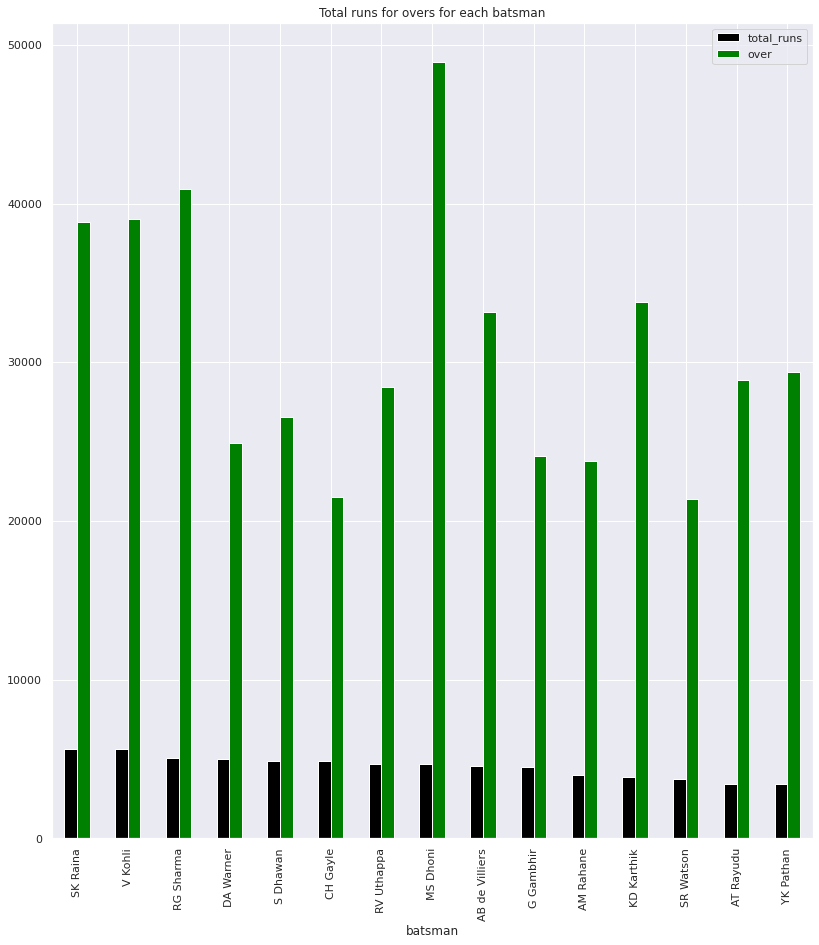

In [154]:

fig=plt.figure(figsize=(30,15))
ax1=fig.add_subplot(121)
b_count.plot(kind = "bar", color = ["black","green"],ax=ax1)
ax1.set_title("Total runs for overs for each batsman")

Observation : SK Raina has scored the maximumt total runs of 5651

In [155]:
t_count=d_data.groupby('batting_team')[["total_runs","over"]].sum().sort_values(by = "total_runs", ascending = False)[:15]
display(t_count)

,total_runs,over
batting_team,,
Mumbai Indians,29806,231925
Royal Challengers Bangalore,28125,211138
Kings XI Punjab,27891,213059
Kolkata Knight Riders,27415,209714
Chennai Super Kings,26418,203044
Delhi Daredevils,24388,188775
Rajasthan Royals,22425,175398
Sunrisers Hyderabad,17055,132075
Deccan Chargers,11463,92641


Text(0.5, 1.0, 'Total runs for overs by each team')

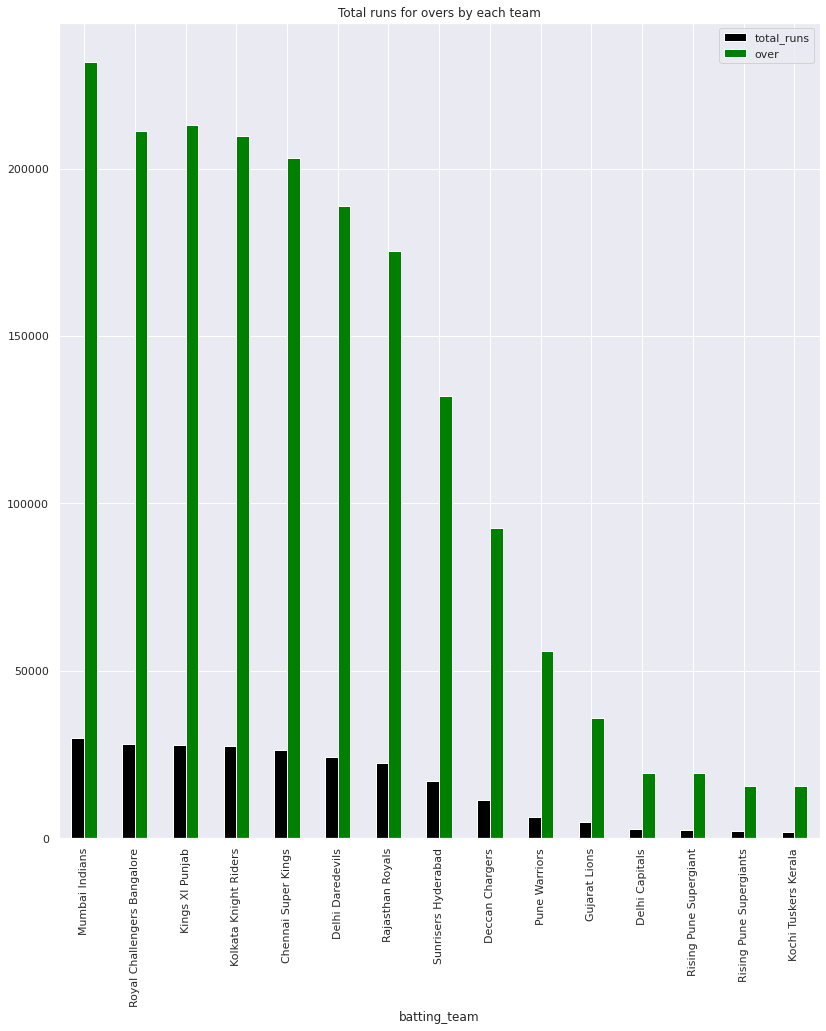

In [156]:
fig=plt.figure(figsize=(30,15))
ax1=fig.add_subplot(121)
t_count.plot(kind = "bar", color = ["black","green"],ax=ax1)
ax1.set_title("Total runs for overs by each team")

Observation : The maximum runs is made my Mumbai Indians of 29806

In [189]:
season_count = m_data['season'].value_counts().sort_values(ascending = False)

display(season_count)

2013    76
2012    74
2011    72
2010    60
2016    60
2018    60
2008    58
2017    58
2019    58
2009    57
2015    57
2014    53
Name: season, dtype: int64

Text(0.5, 1.0, 'Total matches for each season')

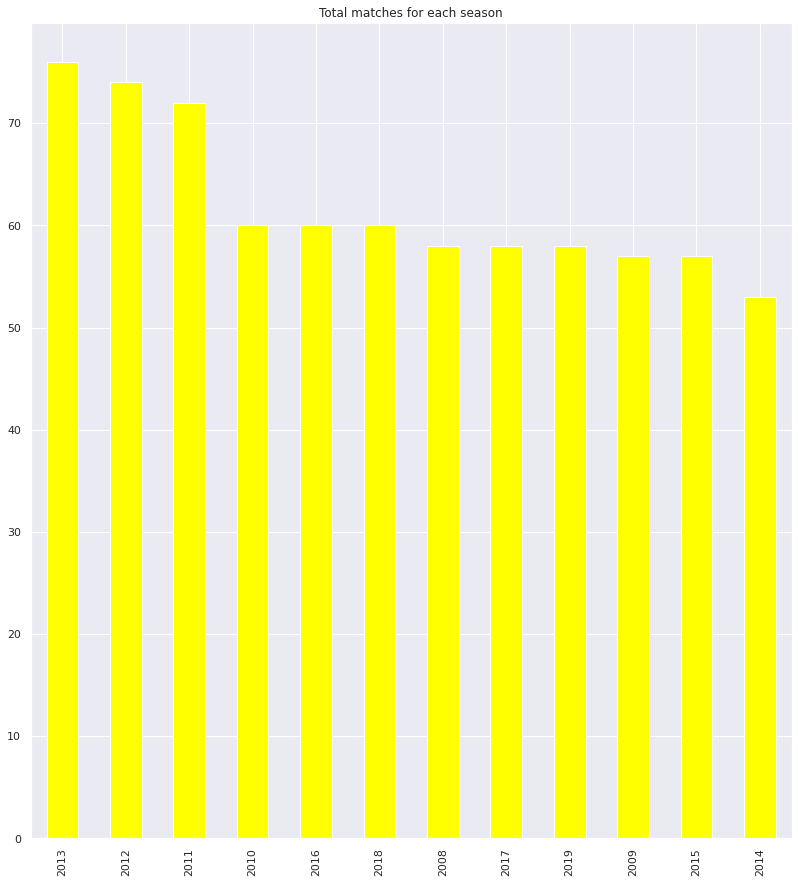

In [190]:
fig=plt.figure(figsize=(30,15))
ax1=fig.add_subplot(121)
season_count.plot(kind = "bar", color = ["yellow"],ax=ax1)
ax1.set_title("Total matches for each season")

Observation : The maximum number of matches was hosted in 2013

In [199]:
print("Total number of matches: ",len(m_data))

Total number of matches:  743


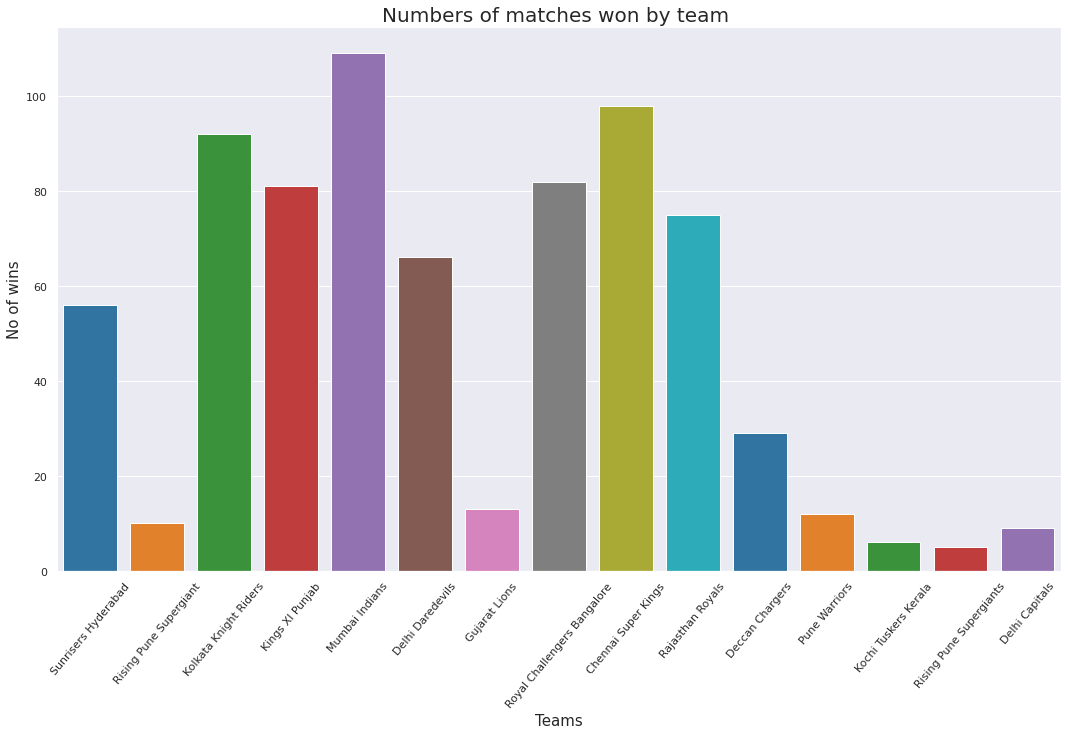

In [200]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=m_data, palette='tab10')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

Observation: The maximum number of matches have been won my Mumbai Indians

In [160]:
v_count = m_data['venue'].value_counts().sort_values(ascending = False)[:15]

display(v_count)

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   70
Feroz Shah Kotla                                        66
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Name: venue, dtype: int64

In [161]:
len(m_data["venue"].unique())

40

Text(0.5, 1.0, 'Top 15 match Venue')

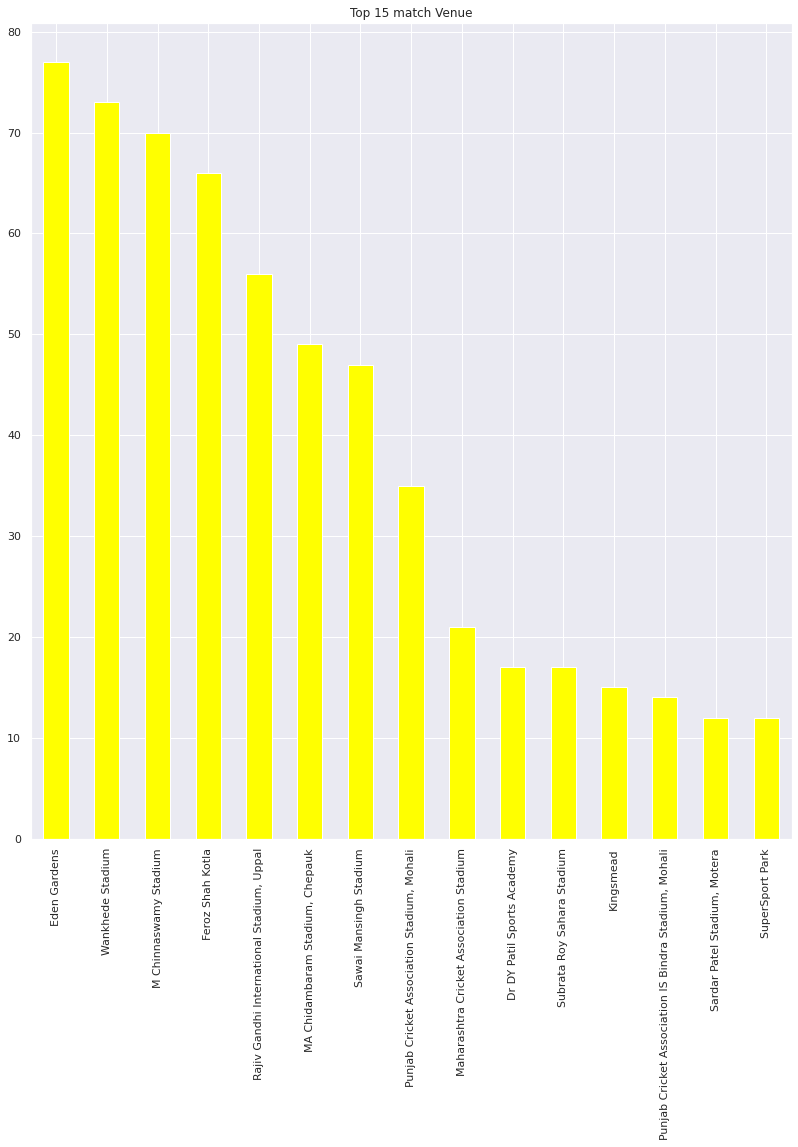

In [162]:
fig=plt.figure(figsize=(30,15))
ax1=fig.add_subplot(121)
v_count.plot(kind = "bar", color = ["yellow"],ax=ax1)
ax1.set_title("Top 15 match Venue")

Observation: Eden Gardens has hosted the maximum number of IPL matches

In [163]:
pom_count = m_data['player_of_match'].value_counts().sort_values(ascending = False)[:15]

display(pom_count)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
V Kohli           12
AM Rahane         12
DR Smith          11
V Sehwag          11
A Mishra          11
Name: player_of_match, dtype: int64

Text(0.5, 1.0, 'Top 15 man of the match')

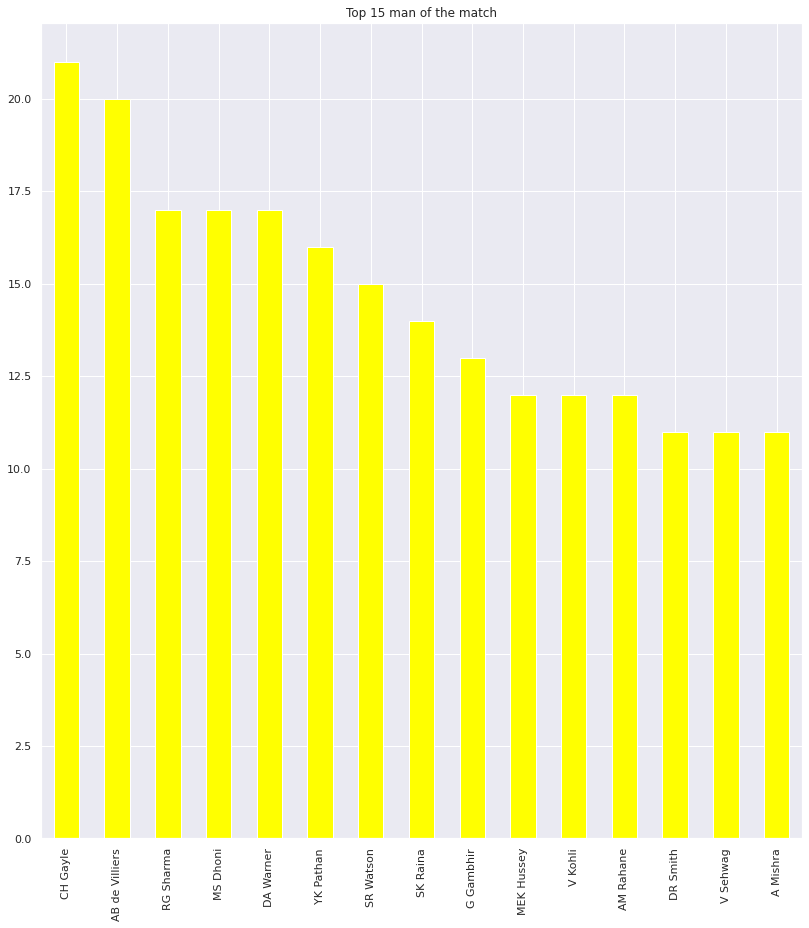

In [164]:
fig=plt.figure(figsize=(30,15))
ax1=fig.add_subplot(121)
pom_count.plot(kind = "bar", color = ["yellow"],ax=ax1)
ax1.set_title("Top 15 man of the match")

Observation: Chris Gayle has won the maximum number of player of the match title

In [165]:
winner_count=m_data.groupby('team1')[["win_by_runs","win_by_wickets"]].sum().sort_values(by = "team1", ascending = False)[:15]
display(winner_count)

,win_by_runs,win_by_wickets
team1,,
Sunrisers Hyderabad,728,185
Royal Challengers Bangalore,1237,276
Rising Pune Supergiants,0,41
Rising Pune Supergiant,123,20
Rajasthan Royals,895,248
Pune Warriors,139,90
Mumbai Indians,1866,262
Kolkata Knight Riders,1068,291
Kochi Tuskers Kerala,23,33


In [166]:
len(m_data["team1"].unique())

15

Text(0.5, 1.0, 'Winning by run or wickets by each team')

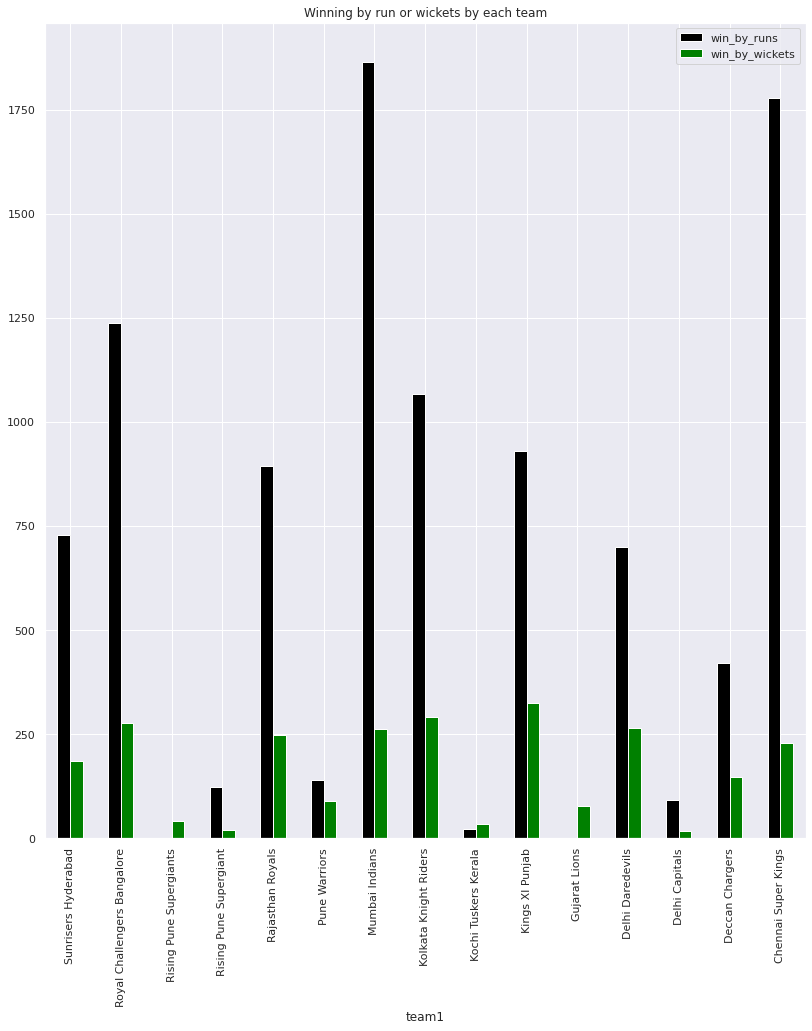

In [167]:
fig=plt.figure(figsize=(30,15))
ax1=fig.add_subplot(121)
winner_count.plot(kind = "bar", color = ["black","green"],ax=ax1)
ax1.set_title("Winning by run or wickets by each team")

#### Observation:

1) The team have won the matches mostly by win_by_runs

2) The team that has won the maximum is Mumbai Indians

In [168]:
city_count = m_data['city'].value_counts().sort_values(ascending = False)[:15]

display(city_count)

Mumbai           101
Kolkata           77
Delhi             73
Hyderabad         64
Bangalore         63
Chennai           57
Jaipur            47
Chandigarh        46
Pune              38
Durban            15
Bengaluru         13
Visakhapatnam     12
Ahmedabad         12
Centurion         12
Rajkot            10
Name: city, dtype: int64

Text(0.5, 1.0, 'Top 15 Cities where the match was hosted')

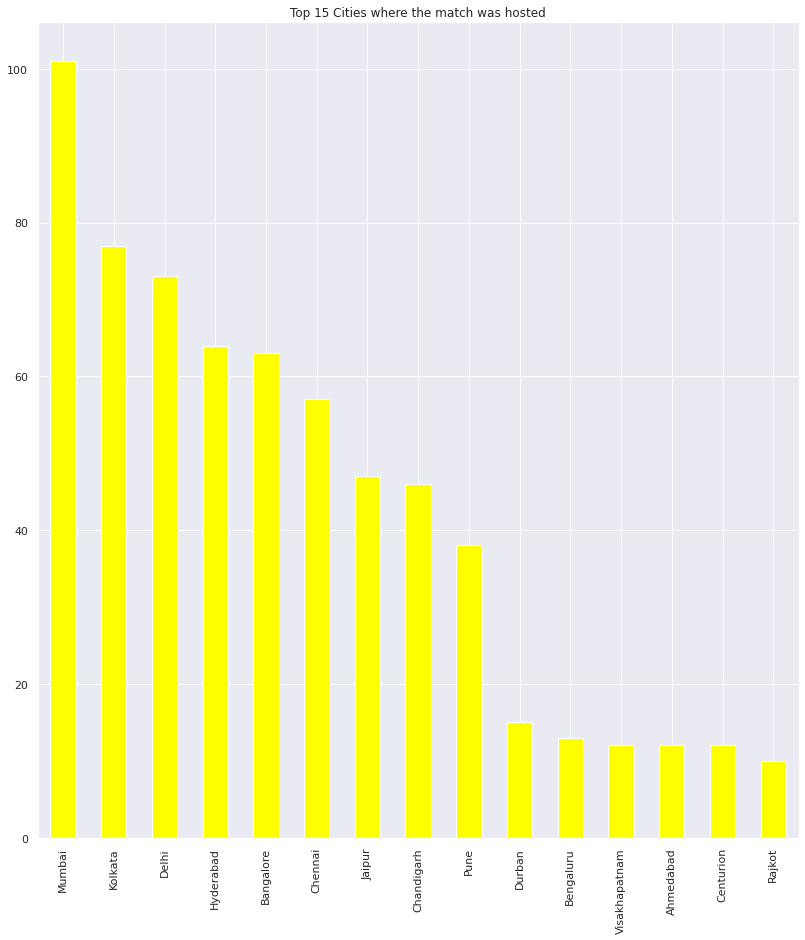

In [169]:
fig=plt.figure(figsize=(30,15))
ax1=fig.add_subplot(121)
city_count.plot(kind = "bar", color = ["yellow"],ax=ax1)
ax1.set_title("Top 15 Cities where the match was hosted")

Observation: The Mumbai city has hosted the most number of IPL matches.

In [201]:
umpire1_c = m_data['umpire1'].value_counts()
umpire2_c = m_data['umpire2'].value_counts()

In [203]:
umpires_df = pd.concat([umpire1_c, umpire2_c], axis=1)[:15]
umpires_df

,umpire1,umpire2
HDPK Dharmasena,70.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,55.0
AK Chaudhary,43.0,14.0
Aleem Dar,36.0,NaN
BF Bowden,35.0,NaN
BR Doctrove,34.0,8.0
M Erasmus,31.0,20.0
Nitin Menon,20.0,22.0
RE Koertzen,20.0,21.0


In [209]:
umpire_c=umpires_df.sum(axis=1).sort_values(ascending=False)
display(umpire_c)

S Ravi                   104.0
HDPK Dharmasena           84.0
C Shamshuddin             73.0
AK Chaudhary              57.0
Asad Rauf                 51.0
M Erasmus                 51.0
BR Doctrove               42.0
Nitin Menon               42.0
RE Koertzen               41.0
Aleem Dar                 36.0
BF Bowden                 35.0
S Asnani                  30.0
CB Gaffaney               24.0
JD Cloete                 16.0
KN Ananthapadmanabhan     14.0
dtype: float64

Text(0.5, 1.0, 'Top 15 umpire 1 of the match')

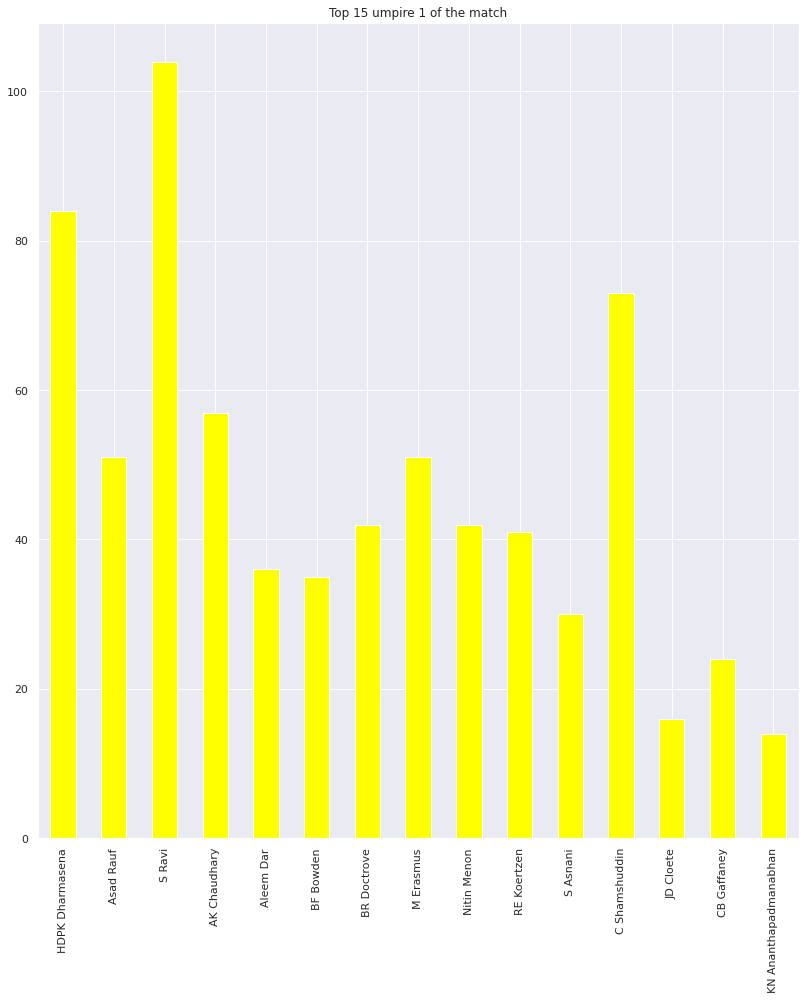

In [206]:
fig=plt.figure(figsize=(30,15))
ax1=fig.add_subplot(121)
umpire_c.plot(kind = "bar", color = ["yellow"],ax=ax1)
ax1.set_title("Top 15 umpires of the match")

#### Observation: 
S. Ravi has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena.

In [174]:
# we will print winner season wise
final_matches=m_data.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [175]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [176]:
toss_count = m_data['toss_winner'].value_counts().sort_values(ascending = False)[:15]

display(toss_count)

Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    78
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Observation: The maximum number of tosses have been won my Mumbai Indians

In [177]:
wi_count = 0
for index, value in m_data.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        wi_count += 1

print(f'The number of times the team winning toss have won: {wi_count}')
prob = wi_count/len(m_data)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    


The number of times the team winning toss have won: 388
The probability of winning if won the toss: 0.52


#### Observation :
The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. 

Text(0.5, 1.0, 'Top 15 teams who have won the toss')

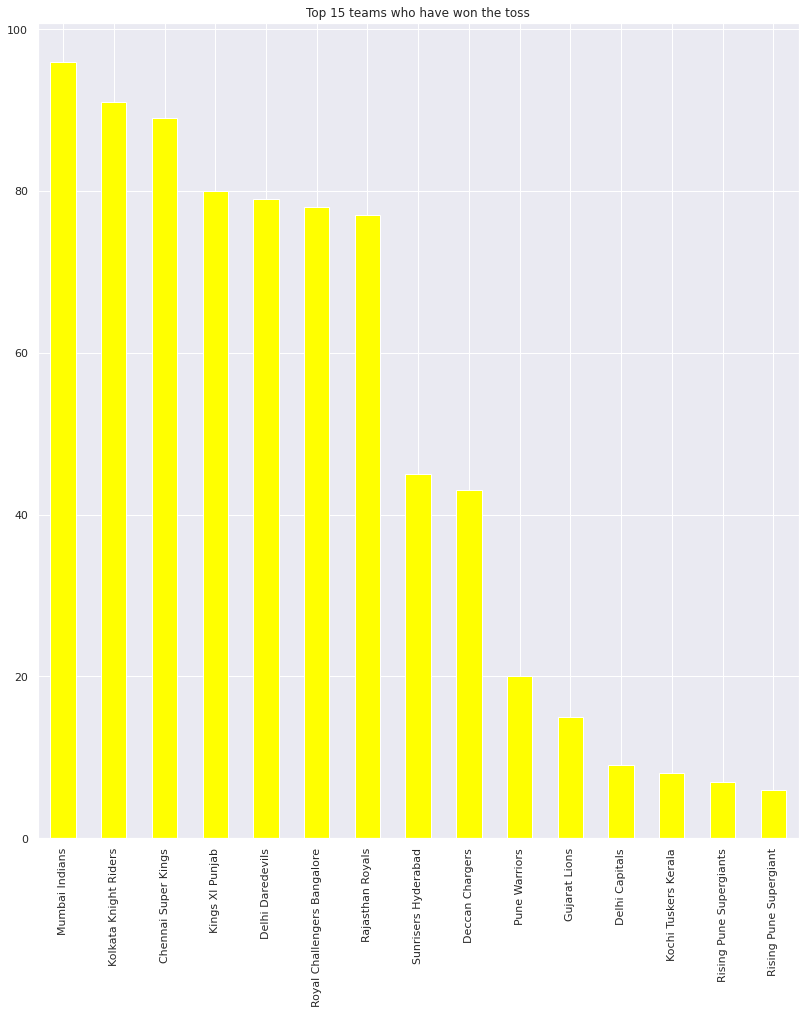

In [210]:
fig=plt.figure(figsize=(30,15))
ax1=fig.add_subplot(121)
toss_count.plot(kind = "bar", color = ["yellow"],ax=ax1)
ax1.set_title("Top 15 teams who have won the toss")

In [179]:
 #we will print numbers of fours hit by team
four_data=d_data[d_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


Chennai Super Kings have hit the maximum no. of fours(2193)

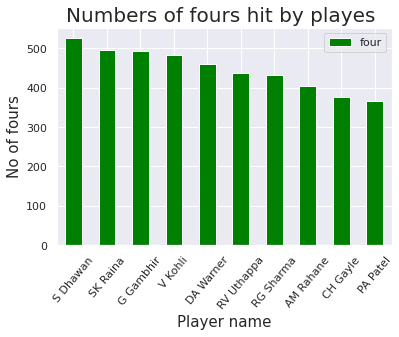

In [180]:

# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='green')
plt.title("Numbers of fours hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

The maximum number of fours have been hit by S Dhawan

In [181]:
# we will print no of sixes hit by team
six_data=d_data[d_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


CSK had hit the maximum number of six (973)

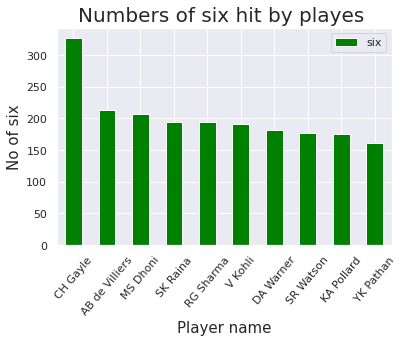

In [182]:

# we will plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

The maximum Sixes have been hit by Chris Gayle

In [185]:
batsman_score=d_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 Leading batsman Run Scorer in IPL")
batsman_score.iloc[:10,:]

Top 10 Leading batsman Run Scorer in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4631
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4444
8,AB de Villiers,4428
9,G Gambhir,4223


The player who has scored the maximum batsman run is Virat Kohli with 5434 runs

# Insights drawn after Exploratory Data analysis

1) Mumbai Indians is the most successful team in IPL.

2) Mumbai Indians has won the most number of toss.

3) The Mumbai city has hosted the most number of IPL matches.

4) Chris Gayle has won the maximum number of player of the match title.

5) Winning toss gives a slight edge(52% probability of winning) against the opponents.

6) More than five Indian players have figured in the top ten IPL player of the match list.

7) S. Ravi has officiated the most number of IPL matches on-field.

8) Eden Gardens has hosted the maximum number of IPL matches.

9) From 2008 to 2019, 40 venues have hosted 743 IPL matches.

10) The player who has scored the maximum batsman run is Virat Kohli with 5434 runs

11) The maximum Sixes have been hit by Chris Gayle

12) The maximum number of fours have been hit by S Dhawan

13) CSK had hit the maximum number of six (973) and maximum number of fours(2193)

14) The team have won the matches mostly by win_by_runs with Mumbai Indians having maximum runs 29806

15) The maximum number of matches was hosted in 2013

16) SK Raina has scored the maximumt total runs of 5651

17) The player who has scored the maximum batsman run is Virat Kohli with 5434 runs.



 ### Suggest teams or players a company should endorse for its products.
 
 1) The team Mumbai Indians can be approached by the company to endorese its product as its evident that it has won the most most matches with maximum runs and is more known and popular amongst the people.
 
 2) Players Virat Kohli, Suresh Raina can be approached to endorse the products as they are most popular in the country as they have scored the maximum runs.
 
 3) Chris Gayle can be approached to endorse products as he has been given the title of Player of the match the maximum times and is known to be popular amongst the common people.